In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#used for plotting graph
import seaborn as sns#ised for plotting graph and used for daat visualisation
from sklearn.tree import DecisionTreeClassifier#used for clasification
from sklearn.linear_model import LogisticRegression#used for solving binary classification problems
from sklearn.naive_bayes import BernoulliNB#predict a binary target variable  and here the input features are independent of each other.
from sklearn.model_selection import train_test_split# It is used to split a dataset into two subsets: a training set and a test set.
#The training set is used to train a machine learning model, while the test set is used to evaluate the performance of the model on unseen data.
from sklearn.metrics import accuracy_score#t is used to calculate the accuracy of a machine learning model's predictions.
from sklearn.preprocessing import LabelEncoder#It is used to encode categorical labels as numerical values.
from sklearn.metrics import precision_score, recall_score, f1_score
#This above one are used to calculate different measures of a machine learning model's performance.


In [4]:
df1 = pd.read_csv("caffeine.csv")
#The read_csv() function is a pandas function that reads a CSV file into a pandas DataFrame
df1.info()
# This function displays a summary of the DataFrame's columns, the number of non-null values in each column, and the data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [5]:
#df1 = df1.drop(columns=["drink"])
df1.rename({"Caffeine (mg)":"Caffeine"}, axis=1, inplace=True)
#rename is used for giving the new col names for the old cols
#inplace = true gives that original df should be modified instead of creating new df
df1.nunique()
#to count the number of unique values in each column of the DataFrame.

drink          610
Volume (ml)     70
Calories        98
Caffeine       162
type             6
dtype: int64

**Data Preprocessing**

In [6]:
#preprocessing
df1.isnull().sum()

drink          0
Volume (ml)    0
Calories       0
Caffeine       0
type           0
dtype: int64

In [7]:
df1.duplicated().sum()

0

In [8]:
df1['type'].value_counts()#gives different types of drinks and number of times it repeated in dataset
#returns the count of all unique values

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

In [9]:
#The sns.barplot() function creates the bar plot itself
#The plt.figure(figsize=(15,5)) line sets the size of the figure that will be displayed to 15 inches wide and 5 inches tall.
#The data=df1 argument specifies that the data for the plot should come from the df1

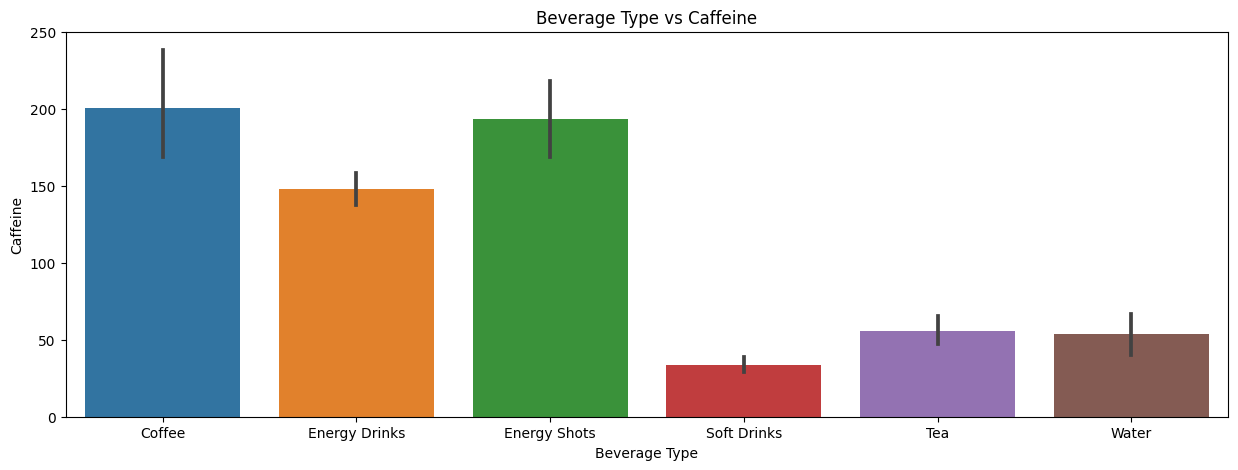

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='type',y='Caffeine',data = df1)
plt.title('Beverage Type vs Caffeine')
plt.xlabel('Beverage Type')
plt.ylabel('Caffeine')
plt.show()


In [11]:
#The first line uses the pd.get_dummies() function to convert the categorical column "type" into one-hot encoded columns
# This function creates a new DataFrame type_en where each unique value in "type" becomes a new column with binary values
#indicating whether or not that value is present in each row of the original "type" column.
#The second line creates a copy of df1 and removes the "type" column using the drop() function with axis=1 (meaning drop the column, not the row).
#The third line concatenates the new one-hot encoded type_en DataFrame with the original df2 DataFrame using the pd.concat() function with axis=1.

In [12]:

type_en = pd.get_dummies(df1["type"])
df2 = df1.copy()
df2.drop("type", axis=1, inplace=True)
df2 = pd.concat([df2, type_en], axis=1)
df2.head()
df2

,drink,Volume (ml),Calories,Caffeine,Coffee,Energy Drinks,Energy Shots,Soft Drinks,Tea,Water
0,Costa Coffee,256.993715,0,277,1,0,0,0,0,0
1,Coffee Friend Brewed Coffee,250.191810,0,145,1,0,0,0,0,0
2,Hell Energy Coffee,250.191810,150,100,1,0,0,0,0,0
3,Killer Coffee (AU),250.191810,0,430,1,0,0,0,0,0
4,Nescafe Gold,250.191810,0,66,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,0,0,0,0,0,1
606,Polar Seltzer Water,354.882000,0,0,0,0,0,0,0,1
607,Yerbae Sparkling Water,354.882000,0,100,0,0,0,0,0,1
608,Tonic Water,295.735000,110,0,0,0,0,0,0,1


In [13]:
labelencoder =  LabelEncoder()
#This fit_transform method fits the label encoder to the unique values in the 'drink' column and then transforms the values into encoded integers.
df2['drink'] = labelencoder.fit_transform(df2['drink'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    int64  
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine       610 non-null    int64  
 4   Coffee         610 non-null    uint8  
 5   Energy Drinks  610 non-null    uint8  
 6   Energy Shots   610 non-null    uint8  
 7   Soft Drinks    610 non-null    uint8  
 8   Tea            610 non-null    uint8  
 9   Water          610 non-null    uint8  
dtypes: float64(1), int64(3), uint8(6)
memory usage: 22.8 KB


In [14]:
#DataFrame using the np.vectorize function, which allows the function to be applied element-wise to the column.
#The resulting binary values are stored in a NumPy array called cfinal.

In [15]:
temp = np.array(df1["Caffeine"])
def caffeine_yesno(caffeine):
    if (caffeine >= 100):
        return 1
    else:
        return 0

caff_v = np.vectorize(caffeine_yesno)
cfinal = caff_v(temp)
df2.drop(columns=["Caffeine"])
df2["Caffeine"] = cfinal;
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    int64  
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine       610 non-null    int64  
 4   Coffee         610 non-null    uint8  
 5   Energy Drinks  610 non-null    uint8  
 6   Energy Shots   610 non-null    uint8  
 7   Soft Drinks    610 non-null    uint8  
 8   Tea            610 non-null    uint8  
 9   Water          610 non-null    uint8  
dtypes: float64(1), int64(3), uint8(6)
memory usage: 22.8 KB


In [16]:
dat1 = df2
dat1 = dat1.drop(columns=["Caffeine"])


In [17]:
dat1.insert(9, 'Caffeine', cfinal)
dat1.head()

,drink,Volume (ml),Calories,Coffee,Energy Drinks,Energy Shots,Soft Drinks,Tea,Water,Caffeine
0,141,256.993715,0,1,0,0,0,0,0,1
1,137,250.191810,0,1,0,0,0,0,0,1
2,233,250.191810,150,1,0,0,0,0,0,1
3,262,250.191810,0,1,0,0,0,0,0,1
4,342,250.191810,0,1,0,0,0,0,0,0


In [18]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    int64  
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Coffee         610 non-null    uint8  
 4   Energy Drinks  610 non-null    uint8  
 5   Energy Shots   610 non-null    uint8  
 6   Soft Drinks    610 non-null    uint8  
 7   Tea            610 non-null    uint8  
 8   Water          610 non-null    uint8  
 9   Caffeine       610 non-null    int64  
dtypes: float64(1), int64(3), uint8(6)
memory usage: 22.8 KB


In [19]:

y = dat1['Caffeine']
x = dat1.drop('Caffeine', axis=1)

In [20]:
#x is typically a NumPy array or Pandas DataFrame containing the features or independent variables of the dataset.
#y is typically a NumPy array or Pandas Series containing the target or dependent variable of the dataset.
#test_size is the proportion of the dataset to include in the testing subset. For example, test_size=0.4
#means that 40% of the data will be used for testing and 60% will be used for training.
#Other arguments include train_size, random_state, and shuffle, which control the size of the training subset,
#the random seed used for splitting, and whether to shuffle the data before splitting, respectively.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [22]:
#In the code you provided, a DecisionTreeClassifier is created and trained on the training data using the fit method.
#The fit method takes two arguments: the features (x_train) and the target (y_train).
#This creates a decision tree model that can be used to make predictions on new data.

#The predict method is then used to make predictions on the testing data (x_test).
#These predictions are stored in the dtPredictions variable.

#Finally, the precision_score, recall_score, and f1_score functions from scikit-learn's metrics module are used to compute
#the precision, recall, and F1 score of the model's predictions on the testing data.
#These metrics are commonly used to evaluate the performance of binary classification models.

#The precision_score measures the proportion of true positives (correctly predicted positives) among all predicted positives.
#The recall_score measures the proportion of true positives among all actual positives.
#The f1_score is the harmonic mean of precision and recall, and is a balanced measure that takes both precision and recall into account.

**Decision Tree Classification**

In [23]:
precisionscore=[]
Accuracyscore = []
Recallscore = []

In [24]:
#using decision trees
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(x_train, y_train)
dtPredictions = dtclassifier.predict(x_test)
precision = precision_score(y_test, dtPredictions)
recall = recall_score(y_test, dtPredictions)
f1 = f1_score(y_test, dtPredictions)


In [25]:
print("Accuracy score : {:.2f}".format(dtclassifier.score(x_test, y_test)))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
precisionscore.append(precision)
Accuracyscore.append(dtclassifier.score(x_test, y_test))
Recallscore.append(recall)

Accuracy score : 0.79
Precision: 0.77
Recall: 0.84
F1-score: 0.80


**Naivebayes Classification**

In [26]:
#using Naivebayes classifier
NB_Classifier = BernoulliNB()
NB_Classifier.fit(x_train, y_train)
NB_Predictions = NB_Classifier.predict(x_test)
precision = precision_score(y_test, NB_Predictions)
recall = recall_score(y_test, NB_Predictions)
f1 = f1_score(y_test, NB_Predictions)

In [27]:
print("Accuracy score : {:.2f}".format(accuracy_score(NB_Predictions, y_test)))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
precisionscore.append(precision)
Accuracyscore.append(accuracy_score(NB_Predictions, y_test))
Recallscore.append(recall)

Accuracy score : 0.76
Precision: 0.69
Recall: 0.96
F1-score: 0.80


**Logistic Regression**

In [28]:
#using logistic regression
LR_clsifier = LogisticRegression(solver='lbfgs', max_iter=1000)
LR_clsifier.fit(x_train, y_train)
LR_Predictions = LR_clsifier.predict(x_test)
precision = precision_score(y_test, LR_Predictions)
recall = recall_score(y_test, LR_Predictions)
f1 = f1_score(y_test, LR_Predictions)

In [29]:
print("Accuracy score : {:.2f}".format(accuracy_score(LR_Predictions, y_test)))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
precisionscore.append(precision)
Accuracyscore.append(accuracy_score(LR_Predictions, y_test))
Recallscore.append(recall)

Accuracy score : 0.78
Precision: 0.71
Recall: 0.93
F1-score: 0.81


In [30]:
print(y_test)

139    1
322    1
492    0
456    0
474    0
      ..
336    1
318    1
36     1
154    1
211    0
Name: Caffeine, Length: 244, dtype: int64


In [31]:
dat1.head()

,drink,Volume (ml),Calories,Coffee,Energy Drinks,Energy Shots,Soft Drinks,Tea,Water,Caffeine
0,141,256.993715,0,1,0,0,0,0,0,1
1,137,250.191810,0,1,0,0,0,0,0,1
2,233,250.191810,150,1,0,0,0,0,0,1
3,262,250.191810,0,1,0,0,0,0,0,1
4,342,250.191810,0,1,0,0,0,0,0,0


In [32]:
print(precisionscore)

[0.7686567164179104, 0.686046511627907, 0.7142857142857143]


In [33]:
labels = ['DecisionTree', 'Naivebayes', 'Logisticregression']
bar_width = 0.25


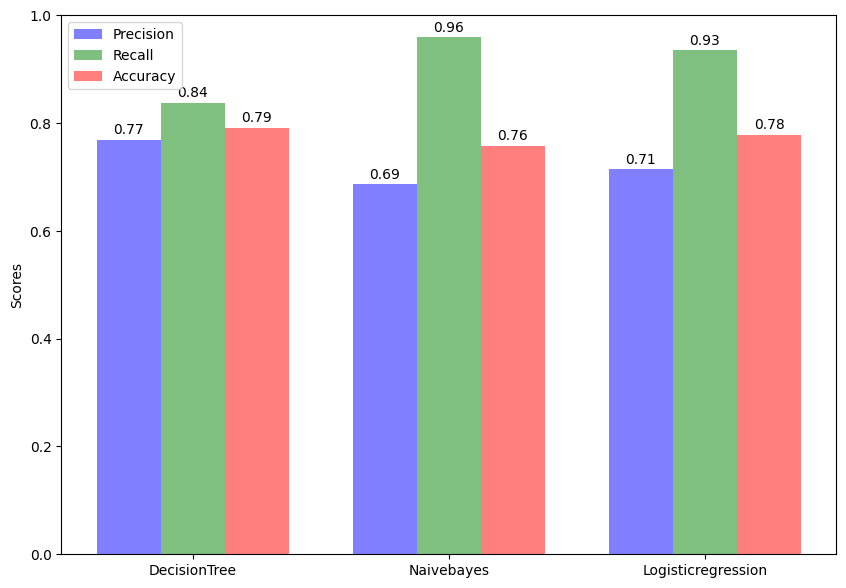

In [34]:
# Set the x-axis locations
x_pos = np.arange(len(labels))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the bars
rects1 = ax.bar(x_pos, precisionscore, width=bar_width, color='blue', alpha=0.5, label='Precision')
rects2 = ax.bar(x_pos + bar_width, Recallscore, width=bar_width, color='green', alpha=0.5, label='Recall')
rects3 = ax.bar(x_pos + 2*bar_width, Accuracyscore, width=bar_width, color='red', alpha=0.5, label='Accuracy')

# Set the axis limits and labels
ax.set_ylim([0, 1])
ax.set_ylabel('Scores')
ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(labels)

# Add a legend
ax.legend()

# Add values above the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2), textcoords='offset points', ha='center', va='bottom')

add_values(rects1)
add_values(rects2)
add_values(rects3)

# Show the plot
plt.show()

**Example Input**

In [35]:
m = LogisticRegression(max_iter = 1000)
m.fit(x,y)

LogisticRegression(max_iter=1000)

In [36]:
import joblib
joblib.dump(m,"caffeine (1).csv")
mod = joblib.load("caffeine (1).csv")

In [37]:
pred = mod.predict([[141,256.993715,0,1,0,0,0,0,0]])
if pred == 1:
  print("High Caffeine Content")
else:
  print("Low Caffeine Content")

High Caffeine Content


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
